In [28]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib, pandas as pd
!pip install xlrd

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [29]:
df = pd.read_excel("E:/OAG PREDECTION/forecast1/FUR/Appeals and Opinions Albany.xls")
df.head(5)

,BUREAU,NoOfDaysTakenAppeals and Opinions Albany,YEAR
0,Appeals and Opinions Albany,238,2007-01-25
1,Appeals and Opinions Albany,451,2007-02-27
2,Appeals and Opinions Albany,301,2007-03-09
3,Appeals and Opinions Albany,375,2007-04-02
4,Appeals and Opinions Albany,370,2007-05-21


In [30]:
oag= df.loc[df['BUREAU'] == 'Appeals and Opinions Albany']

In [31]:
oag['YEAR'].min(), oag['YEAR'].max()

(Timestamp('2007-01-25 00:00:00'), Timestamp('2017-12-19 00:00:00'))

In [32]:
cols = ['BUREAU']
oag.drop(cols, axis=1, inplace=True)
oag   = oag.sort_values('YEAR')

oag.isnull().sum()

NoOfDaysTakenAppeals and Opinions Albany    0
YEAR                                        0
dtype: int64

In [33]:
oag = oag.groupby('YEAR')['NoOfDaysTakenAppeals and Opinions Albany'].mean().reset_index()

In [34]:
oag.head()

,YEAR,NoOfDaysTakenAppeals and Opinions Albany
0,2007-01-25,238
1,2007-02-27,451
2,2007-03-09,301
3,2007-04-02,375
4,2007-05-21,370


In [35]:
oag = oag.set_index('YEAR')
oag.index

DatetimeIndex(['2007-01-25', '2007-02-27', '2007-03-09', '2007-04-02',
               '2007-05-21', '2007-06-21', '2007-07-11', '2007-08-16',
               '2007-09-04', '2007-10-01',
               ...
               '2017-03-20', '2017-04-13', '2017-05-16', '2017-06-01',
               '2017-07-19', '2017-08-24', '2017-09-21', '2017-10-25',
               '2017-11-02', '2017-12-19'],
              dtype='datetime64[ns]', name='YEAR', length=132, freq=None)

In [36]:
y = oag['NoOfDaysTakenAppeals and Opinions Albany'].resample('MS').mean()
y


YEAR
2007-01-01    238
2007-02-01    451
2007-03-01    301
2007-04-01    375
2007-05-01    370
2007-06-01    550
2007-07-01    288
2007-08-01    263
2007-09-01    325
2007-10-01    189
2007-11-01    311
2007-12-01    295
2008-01-01    292
2008-02-01    383
2008-03-01    366
2008-04-01    229
2008-05-01    357
2008-06-01    275
2008-07-01    365
2008-08-01    405
2008-09-01    449
2008-10-01    356
2008-11-01    428
2008-12-01    320
2009-01-01    426
2009-02-01    427
2009-03-01    427
2009-04-01    428
2009-05-01    430
2009-06-01    430
             ... 
2015-07-01    268
2015-08-01    475
2015-09-01    277
2015-10-01    357
2015-11-01    255
2015-12-01    363
2016-01-01    228
2016-02-01    285
2016-03-01    362
2016-04-01    244
2016-05-01    388
2016-06-01    465
2016-07-01    228
2016-08-01    208
2016-09-01    190
2016-10-01     99
2016-11-01    191
2016-12-01     60
2017-01-01     95
2017-02-01     27
2017-03-01     73
2017-04-01     23
2017-05-01     50
2017-06-01     42
2017-

In [37]:
y['2007':]

YEAR
2007-01-01    238
2007-02-01    451
2007-03-01    301
2007-04-01    375
2007-05-01    370
2007-06-01    550
2007-07-01    288
2007-08-01    263
2007-09-01    325
2007-10-01    189
2007-11-01    311
2007-12-01    295
2008-01-01    292
2008-02-01    383
2008-03-01    366
2008-04-01    229
2008-05-01    357
2008-06-01    275
2008-07-01    365
2008-08-01    405
2008-09-01    449
2008-10-01    356
2008-11-01    428
2008-12-01    320
2009-01-01    426
2009-02-01    427
2009-03-01    427
2009-04-01    428
2009-05-01    430
2009-06-01    430
             ... 
2015-07-01    268
2015-08-01    475
2015-09-01    277
2015-10-01    357
2015-11-01    255
2015-12-01    363
2016-01-01    228
2016-02-01    285
2016-03-01    362
2016-04-01    244
2016-05-01    388
2016-06-01    465
2016-07-01    228
2016-08-01    208
2016-09-01    190
2016-10-01     99
2016-11-01    191
2016-12-01     60
2017-01-01     95
2017-02-01     27
2017-03-01     73
2017-04-01     23
2017-05-01     50
2017-06-01     42
2017-

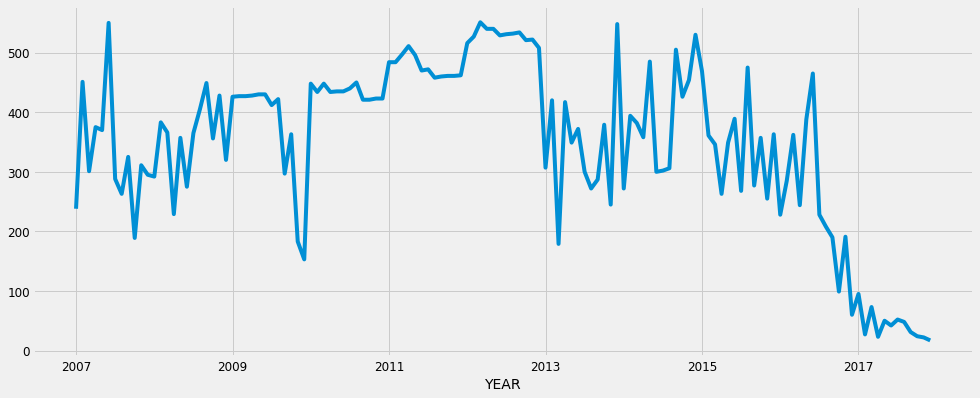

In [38]:
y.plot(figsize=(15, 6))
plt.show()

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1943.3504686800143
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1841.6595729795756
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1535.8183633344274
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1532.4746819934676
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1702.05997851244
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1700.5201612395858
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1531.748588882661
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1531.7687691148399
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1826.6922580620133
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1773.4073902599907
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1517.0590467002166
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1507.8680431664807
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1675.805702480946
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1669.3006229657367
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1506.797878361693
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1508.7977108238786
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1577.5144293516296
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1579.11119755719

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4854      0.106     -4.579      0.000      -0.693      -0.278
ma.L1         -0.1740      0.133     -1.311      0.190      -0.434       0.086
ar.S.L12      -0.4969      0.089     -5.614      0.000      -0.670      -0.323
sigma2      8870.9610   1061.479      8.357      0.000    6790.501     1.1e+04


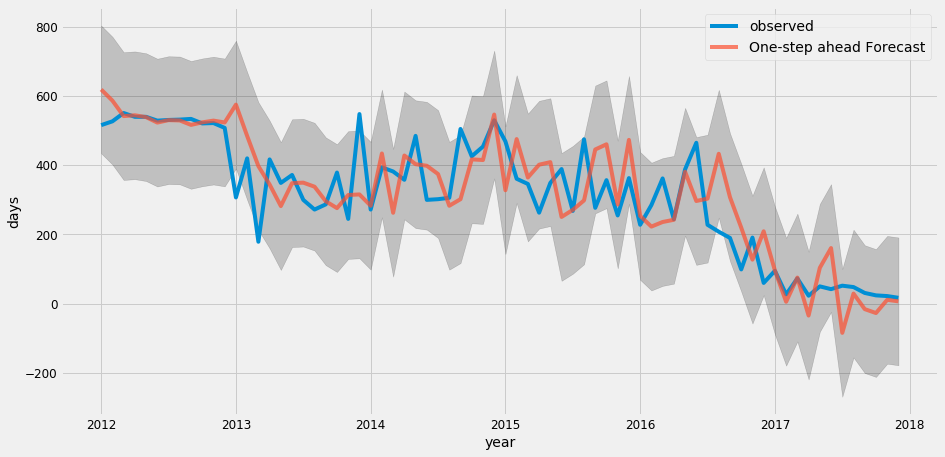

In [42]:
pred = results.get_prediction(start=pd.to_datetime('01-01-2012'), dynamic=False)
pred_ci = pred.conf_int()





ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('year')
ax.set_ylabel('days')
plt.legend()

plt.show()

In [43]:
y_forecasted = pred.predicted_mean
y_truth = y['01-01-2012':]

mse = ((y_forecasted - y_truth) ** 2).mean()


print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 96.83


In [44]:
y_forecasted .to_excel("E:/OAG PREDECTION/forecast1/FUR/siva123456789.xls")

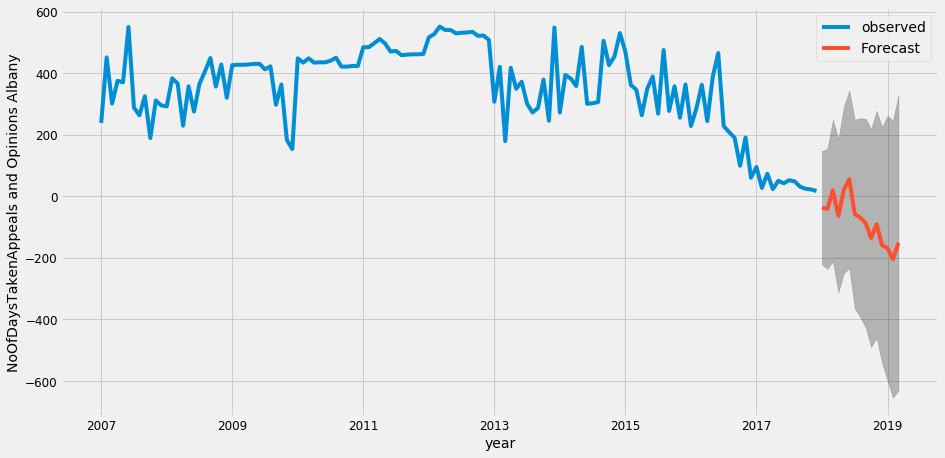

2018-01-01    -37.777832
2018-02-01    -41.089932
2018-03-01     19.064884
2018-04-01    -64.118595
2018-05-01     20.725608
2018-06-01     55.105923
2018-07-01    -57.700430
2018-08-01    -69.617339
2018-09-01    -87.130591
2018-10-01   -135.863176
2018-11-01    -91.157400
2018-12-01   -158.766307
2019-01-01   -168.933461
2019-02-01   -204.389244
2019-03-01   -151.268325
Freq: MS, dtype: float64


In [49]:
pred_uc = results.get_forecast(steps=15)

pred_ci = pred_uc.conf_int()
b=pred_uc.predicted_mean

ax = y.plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('year')
ax.set_ylabel('NoOfDaysTakenAppeals and Opinions Albany')  

plt.legend()
plt.show()
print(b)

In [47]:
b.to_csv("E:/OAG PREDECTION/forecast1/FUR/oag outputforecast12345.csv")